# Learning AI Development with UX (Dec. 8 2018)


Welcome to WTM and GDG Bangalore's session on "Learning AI  Development with UX". This notebook is your primary source for reference and place of work for all hands-on aspects of the workshop. 

The code samples and exercises in this notebook are desgined to run in Google's Colab Environment, while the same can be run on any machine that has python and dependencies for Keras, and Tensorflow installed. 

The code snippets have been adapted from various tutorials and notebooks by Googlers and other researchers, to present a curated guide that covers the following aspects of AI development: 
* Dataset collection
* Transforming raw data to features
* Choosing a good model architecture
* Building and Training an ML Model
* Evaluating model performance and parameter tuning

----
## Text classification - A cookbook

The main use case we will be following in this session is centered around Text Classification problems. While we will be alluding to various aspects of AI development mainly from the context of Text Classification, these concepts can be applied to other domains and problems as well. 

## What can you expect?

As this is an end-to-end tutorial, we will be starting with collecting a dataset, and proceed to preprocessing input data to make it suitable for applying ML Algorithms, and then we will look at how to train neural networks with this preprocessed data, and evalutate our model's performance. We will conclude with a note on applying these concepts to other domain problems, and real world scenarios.  Lets get started!


## Dependencies

As this is a hands-on workshop, we will be using Python as our programming language of choice, due to the vast number of libraries available for AI development, and its demonstrated ease of use for rapid prototyping. We will be building our models using [`keras`](https://keras.io/), a popular framework for working on Machine Learning problems, and we will be using [`tensorflow`](https://www.tensorflow.org/) as our backend for `keras`, to run our computations.  Don't worry if any of this sounds unfamiliar to you, as you will be able to pick it up as we go along. 

For those of you trying this out on your local computers, you may need to install `python3`  or `python2.7` along with `keras` and `tensorflow` -  both of which can be installed using pip. 

If you are running this tutorial in Google's Colab environment, all of these dependencies are installed for you out of the box. Let's start by confirming that we have `keras` installed and available. Run the following snippet to check what version of `keras` is installed here.

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

'2.2.4'

## The Problem 

The basic premise of this hands-on session is Text-Classification. Text Classification in itself is a broad problem area that basically deals with categorizing textual data into one or more categories, depending on the objective and context. Some popular examples of Text Classification problems are: 

* Classifying emails into 'Spam' or 'Not Spam'
* Classifying social media posts as 'Hate Speech' or 'Abusive'
* Classifying product/movie reviews as 'Positive' or 'Negative'

The above examples are that of Binary Classification problems, where the targets/labels are of either one kind or the other. However, Text Classification problems are not only limited to such cases, and we can have classification problems that can have multiple target candidates (more than 2). For example, consider the following cases: 

* Classifying customer queries into topic categories 
* Classifying tweets about the weather by time, sentiment, and kind
* Multi-label classification of news article: eg assiging labels such as "crime", "finance" to an article on financial crimes.

For the purpose of this hands-on session, we will look at classifying movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews. While this problem is fairly simple, it is a good starting point to understand the stages of development of an AI Solution, and the techniques we use are transferrable to a whole range of domains and problems. 

---

## Dataset
Let's consider IMDB movie review sentiment prediction task that you may are already be familiar with. Let's quickly prepare the dataset.

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just 
Google "IMDB dataset"). Uncompress it.


In [0]:
!wget https://github.com/arjun-rao/talks/raw/master/imdb.tar.gz

--2018-12-07 19:21:25--  https://github.com/arjun-rao/talks/raw/master/imdb.tar.gz
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arjun-rao/talks/master/imdb.tar.gz [following]
--2018-12-07 19:21:26--  https://raw.githubusercontent.com/arjun-rao/talks/master/imdb.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14806530 (14M) [application/octet-stream]
Saving to: ‘imdb.tar.gz’

imdb.tar.gz         100%[===================>]  14.12M  38.7MB/s    in 0.4s    

2018-12-07 19:21:26 (38.7 MB/s) - ‘imdb.tar.gz’ saved [14806530/14806530]



In [0]:
!wget https://github.com/arjun-rao/talks/raw/master/imdb-test.tar.gz

--2018-12-07 19:21:29--  https://github.com/arjun-rao/talks/raw/master/imdb-test.tar.gz
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arjun-rao/talks/master/imdb-test.tar.gz [following]
--2018-12-07 19:21:29--  https://raw.githubusercontent.com/arjun-rao/talks/master/imdb-test.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14485124 (14M) [application/octet-stream]
Saving to: ‘imdb-test.tar.gz’

imdb-test.tar.gz    100%[===================>]  13.81M  --.-KB/s    in 0.1s    

2018-12-07 19:21:30 (117 MB/s) - ‘imdb-test.tar.gz’ saved [14485124/14485124]



In [0]:
!tar -xzf imdb.tar.gz

In [0]:
!tar -xzf imdb-test.tar.gz

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels 
(positive / negative) into a `labels` list:

In [0]:
import os

def load_imdb(imdb_dir):
  """Loads the imdb dataset from the given path"""
  train_dir = os.path.join(imdb_dir, 'train')

  labels = []
  texts = []

  for label_type in ['neg', 'pos']:
      dir_name = os.path.join(train_dir, label_type)
      for fname in os.listdir(dir_name):
          if fname[-4:] == '.txt':
              f = open(os.path.join(dir_name, fname))
              texts.append(f.read())
              f.close()
              if label_type == 'neg':
                  labels.append(0)
              else:
                  labels.append(1)
  return texts, labels

texts, labels = load_imdb('./')                 

### Tokenize the data


Let's vectorize the texts we collected. To do this we will also need some popular functions from `nltk`, so let's load them first


In [0]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection u'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nl

True

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def preprocess_stopwords(texts):
  """Returns a lsit of texts with the stopwords removed"""
  result = []
  
  #Load the set of stopwords
  stop_words = set(stopwords.words('english'))
  
   #Split each sentence into words, retain only words in the sentence that are not in the stopwords list
  for text in texts:
    word_tokens = text.split()
    filtered_text = [w for w in word_tokens if not w in stop_words]
    result.append(' '.join(filtered_text))
 
  return result

def tokenize_texts(texts, labels, max_len, max_words, remove_stopwords=True):
  """Returns tokenized data according to given params"""
  data = []
  labels = np.asarray(labels)
  
  #Remove stop words if param is True
  if remove_stopwords:
    texts = preprocess_stopwords(texts)
    
  #Initialise Tokenizer with maxwords, fit the tokenizer to the texts and use the tokenizer to obtain sequences from texts
  #Reference - https://faroit.github.io/keras-docs/2.0.2/preprocessing/text/#tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(texts)
  sequences = tokenizer.texts_to_sequences(texts)
  
  #Pad the sequences to obtain vectors of 'max_len'
  #https://faroit.github.io/keras-docs/2.0.2/preprocessing/sequence/#pad_sequences
  data = pad_sequences(sequences, maxlen=max_len)
  
  return data, labels, tokenizer

### Split the tokenized data into Train and Validation sets

In [0]:
import numpy as np

def split_data(data, labels, train_size=20000, validation_size=5000):
  """Returns train and validation data and corresponding labels"""
  x_train = []
  y_train = []
  x_validation = []
  y_validation = []
  
  #Shuffle the data, since we started from data where samples are ordered all negative first, then all positive
  #Make sure you shuffle the data and labels in the same order 
  indices = np.arange(data.shape[0])
  np.random.shuffle(indices)
  data = data[indices]
  labels = labels[indices]
  
  #Split data and labels into train and validation
  x_train = data[:train_size]
  y_train = labels[:train_size]
  x_validation = data[train_size: train_size + validation_size]
  y_validation = labels[train_size: train_size + validation_size]
  
  return ((x_train, y_train), (x_validation, y_validation))

We will tokenize our text to have 20 words per review and restrict our tokenizer to top 10000 words across reviews. We will train our model on 20000 reviews, and validate on 5000 reviews. 

In [0]:
data, labels, tokenizer = tokenize_texts(texts, labels, 20, 10000, remove_stopwords=True)
print('Found %s unique tokens.' % len(tokenizer.word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

((x_train, y_train), (x_val, y_val)) = split_data(data, labels, train_size=20000, validation_size=5000)
print('Shape of train data:', x_train.shape)
print('Shape of train labels:', y_train.shape)
print('Shape of validation data:', x_val.shape)
print('Shape of validation labels:', y_val.shape)


NameError: ignored

Let's see what we just did: 
* We first split the sentences into tokens
* Then we store these tokens into an index
* Then we convert our sentences into a sequence of integers, where each integer is an id for the corresponding word in our index. 

Let's take a look at the result for an example::

In [0]:
print(texts[0])
print(preprocess_stopwords([texts[0]]))

Last of the Johnny Weissmuller Tarzan films and a good thing too, as this is easily the worst of the 12 films he made over a period of 16 years. No mermaids are featured here either as a beautiful island woman tries to escape the clutches of her people, who worship a god and try to force her to be its bride. She finds Tarzan and Jane, who try to protect her. George Zucco is present as a potentially villainous High Priest but isn't used to his full advantage. Also on hand and worthy of mention is a hugely annoying guitar player/singer who goes into song every so often. Even the "great" Robert Florey can't aid this one.<br /><br />*1/2 (of four)
['Last Johnny Weissmuller Tarzan films good thing too, easily worst 12 films made period 16 years. No mermaids featured either beautiful island woman tries escape clutches people, worship god try force bride. She finds Tarzan Jane, try protect her. George Zucco present potentially villainous High Priest used full advantage. Also hand worthy menti

In [0]:
tokens = tokenizer.texts_to_sequences([texts[0]])
tokens = pad_sequences(tokens, maxlen=20)
print(tokens[0])

[ 197 2954  553   94   85  334   12    3   25  610  110 4060    9    6
    1    1  229  162  161  631]


In [0]:
print([tokenizer.index_word[token] for token in tokens[0] if token])

['goes', 'into', 'song', 'every', 'so', 'often', 'even', 'the', 'great', 'robert', "can't", 'aid', 'this', 'one', 'br', 'br', '1', '2', 'of', 'four']


## Word Embeddings (also called Word Vectors)

Before we can train our fancy ML model, lets look at how we can take these sequences of integers and derive some representation that is more meaningful and conveys more information to our models. This is where word embeddings come in. 

Word vectors or embeddings are simply vectors of numbers that represent the meaning of a word in some context. Why do we need word vectors? Our original sequence of word indices do not capture information about a word’s meaning or context. 

This means that potential relationships, such as contextual closeness, are not captured across collections of words in our original sequence. For example, a one-hot encoding from this sequence cannot capture simple relationships, such as determining that the words “dog” and “cat” both refer to animals that are often discussed in the context of household pets.

Word vectors represent words as multidimensional continuous floating point numbers where semantically similar words are mapped to proximate points in geometric space. 

In simpler terms, a word vector is a row of real valued numbers (as opposed to dummy numbers) where each point captures a dimension of the word’s meaning and where semantically similar words have similar vectors. 

This means that words such as wheel and engine should have similar word vectors to the word car (because of the similarity of their meanings), whereas the word banana should be quite distant. 

Put differently, words that are used in a similar context will be mapped to a proximate vector space (we will get to how these word vectors are created below). The beauty of representing words as vectors is that they lend themselves to mathematical operators. 

For example, we can add and subtract vectors — the canonical example here is showing that by using word vectors we can determine that:

king — man + woman = queen

In other words, we can subtract one meaning from the word vector for king (i.e. maleness), add another meaning (femaleness), and show that this new word vector (king — man + woman) maps most closely to the word vector for queen.

The numbers in the word vector represent the word’s distributed weight across dimensions. In a simplified sense each dimension represents a meaning and the word’s numerical weight on that dimension captures the closeness of its association with and to that meaning. Thus, the semantics of the word are embedded across the dimensions of the vector.

## Example for Word Embeddings

Let's see this in action - We'll load a pre-trainied model for word vectors using `spacy` a popular NLP library - and visualize some word vectors using PCA. 

Start by downloading the `en` spacy model to get the pretrained vectors.

In [0]:
!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 89.1MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python2.7/dist-packages/en_core_web_sm -->
    /usr/local/lib/python2.7/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



Let's try and use Spacy's pretrained word vectors to visualize a set of words transformed into word embeddings and reduced to 2 dimensions using PCA.

In [0]:
import numpy as np
import spacy
from sklearn.decomposition import PCA
nlp = spacy.load("en")

In [0]:
words = u"man king woman queen palace royal house"
words_tokens = nlp(words)
words_vectors = np.vstack([word.vector for word in words_tokens if word.has_vector])
pca = PCA(n_components=2)
word_vectors_transformed = pca.fit_transform(words_vectors)

In [0]:
x = np.array([item[0] for item in word_vectors_transformed])
y = np.array([item[1] for item in word_vectors_transformed])

#### So how does an embedding look like? 

From the above example, the embedding for the word `man` is: 


In [0]:
words_tokens[0],words_vectors[0:10]

(man, array([[ 5.6654114e-01,  2.1298788e+00, -7.5750500e-01, ...,
         -4.4764426e-01,  1.5666524e-01, -2.8439707e-01],
        [-3.8338602e-03, -1.7044394e+00,  1.1055291e+00, ...,
         -5.2565366e-02,  2.1175520e-01, -3.5021394e-02],
        [ 1.2737572e-02, -2.4252005e+00,  8.0763125e-01, ...,
          7.3892012e-02, -9.0038776e-04, -2.3811609e-02],
        ...,
        [ 5.9697354e-01,  2.0848435e-01, -2.4370432e+00, ...,
         -7.2301191e-01, -3.9200917e-01,  3.9495468e-01],
        [ 1.5074633e-01,  8.2599211e-01,  6.4324105e-01, ...,
         -5.8896923e-01,  4.8564866e-02,  1.3803323e-01],
        [ 2.3954535e+00,  2.3134739e+00,  3.0796623e+00, ...,
         -3.8401619e-01, -7.3281050e-01,  3.0168864e-01]], dtype=float32))

In [0]:
import pandas as pd
df = pd.DataFrame(
    {'x': x,
     'y': y,
     'txt': words.split()
    })

# plot the dataset, referencing dataframe column names
import altair as alt
base = alt.Chart(df).encode(
    x='x', 
    y='y'
)

base.mark_circle(size=100) + base.mark_text(dx=15).encode(text='txt').interactive()

LayerChart({
  layer: [Chart({
    data:       txt          x          y
    0     man  14.015564   4.079728
    1    king   3.999183   3.894140
    2   woman   8.001021   0.507969
    3   queen  -6.139023  -6.126812
    4  palace   2.822722  -7.135913
    5   royal  -9.862520 -11.066113
    6   house -12.836949  15.846996,
    encoding: EncodingWithFacet({
      x: X({
        shorthand: 'x'
      }),
      y: Y({
        shorthand: 'y'
      })
    }),
    mark: MarkDef({
      size: 100,
      type: 'circle'
    })
  }), Chart({
    data:       txt          x          y
    0     man  14.015564   4.079728
    1    king   3.999183   3.894140
    2   woman   8.001021   0.507969
    3   queen  -6.139023  -6.126812
    4  palace   2.822722  -7.135913
    5   royal  -9.862520 -11.066113
    6   house -12.836949  15.846996,
    encoding: EncodingWithFacet({
      text: Text({
        shorthand: 'txt'
      }),
      x: X({
        shorthand: 'x'
      }),
      y: Y({
        shorthand: 'y'
      })
    }),
    mark: MarkDef({
      dx: 15,
      type: 'text'
    }),
    selection: SelectionMapping({
      selector001: SelectionDef({
        bind: 'scales',
        encodings: ['x', 'y'],
        type: 'interval'
      })
    })
  })]
})

As you can see the words `man` and `woman` are along the same direction and that of `king` and queen are along the same direction as that of `man` and `woman` so the vector direction from `man` -> `woman` probably denotes the semantic meaning of gender. 

Disclaimer:
The PCA visualization is probably not the best way to represent the actual embeddings, but it is illustrative of the broad concept, and hence we have it here. Do not attempt to visualize your actual embeddings using this technique and hope to get some meaningful outcomes. You most probably will not.

## Training a model for the IMDB Dataset

Lets train a simple neural network for our IMDB Dataset and use an embedding layer that first transforms our word sequences into word vectors.

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.

* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. These are called "pre-trained word embeddings".

We'll first go with our first approach by learning the embeddings using the `Embedding` layer from `keras`.


The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. It takes 
as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively a dictionary lookup.

The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of integers. It can embed sequences of variable lengths, so for instance we could feed into our embedding layer above batches that could have shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15) (batch of 64 sequences of length 15). All sequences in a batch must have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating point tensor, of shape (samples, sequence_length, embedding_dimensionality). Such a 3D tensor can then be processed by a RNN layer or a 1D convolution layer.

When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just like with any other layer. During training, these word vectors will be gradually adjusted via backpropagation, structuring the space into something that the downstream model can exploit. Once fully trained, your embedding space will show a lot of structure -- a kind of structure specialized for the specific problem you were training your model for.

## Recap

We generated our training set using the following block of code:

In [0]:
data, labels, tokenizer = tokenize_texts(texts, labels, 20, 10000, remove_stopwords=True)
((x_train, y_train), (x_val, y_val)) = split_data(data, labels, train_size=20000, validation_size=5000)
print('Shape of train data:', x_train.shape)
print('Shape of train labels:', y_train.shape)

('Shape of train data:', (20000, 20))
('Shape of train labels:', (20000,))


## Build and train a Sequential model with the following specs:

* Embedding Layer with maximum number of tokes to be 10000 and embedding dimensionality as 8. Let the input_length be the maximum length of each review i.e 20 as seen previously.
* Flatten the 3D embedding output to 2D.
* Dense Layer which is the classifier.
* Compile the model with a 'rmsprop' optimizer. Can you guess what loss we need to use?
* Let accuracy be one of the metrics we are interested in.
* Run the model on the above training data. 

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()

# Add an Embedding Layer with maximum number of tokens to be 10000 and embedding dimensionality as 8. 
# Let the input_length be the maximum length of each review i.e 20 as seen previously.
# Refernece - https://keras.io/layers/embeddings/
model.add(Embedding(10000, 8, input_length=20))

# After the Embedding layer, our activations have shape `(samples, maxlen, 8)`.
# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(samples, maxlen * 8)`
# Reference - https://keras.io/layers/core/#flatten
model.add(Flatten())

# We add a Dense classifier on top with a sigmoid activation
# Reference - https://keras.io/layers/core/#dense
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a 'rmsprop' optimizer. Can you guess what loss we need to use?
# Let accuracy be one of the metrics we are interested in.
# Reference - https://keras.io/models/model/#compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Run the model on the above training data for 10 epochs and batch size of 32
# Pass the validation data to evaluate the model
# Reference- https://keras.io/models/model/#fit
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 116us/step - loss: 0.6528 - acc: 0.6593 - val_loss: 0.5687 - val_acc: 0.7546
Epoch 2/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.4753 - acc: 0.7985 - val_loss: 0.4567 - val_acc: 0.7814
Epoch 3/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.3938 - acc: 0.8282 - val_loss: 0.4342 - val_acc: 0.7894
Epoch 4/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.3546 - acc: 0.8468 - val_loss: 0.4316 - val_acc: 0.7932
Epoch 5/10
20000/20000 [==============================] - 1s 67us/step - loss: 0.3272 - acc: 0.8610 - val_loss: 0.4348 - val_acc: 0.7940
Epoch 6/10
20000/20000 [==============================] - 2s 80us/step - loss: 0.3034 - acc: 0.8731 - val_loss: 0.4409 - val_acc: 0.7894
Epoch 7/10
20000/20000 [==============================] - 2s 81us/step - loss: 0.2811 - acc: 0.8851 - val_loss: 0.4487 - val_acc

The resulting model accuracy is rather low. Let's see if we can improve this by tweaking a few parameters in our model. We'll first increase the number of words we consider.


In [0]:
#Load the dataset again
#Tokenize the data, this time passing max_len as 200
#Split the data into train and validation
texts, labels = load_imdb('./')  
data, labels, tokenizer = tokenize_texts(texts, labels, 200, 10000, remove_stopwords=True)
((x_train, y_train), (x_val, y_val)) = split_data(data, labels, train_size=20000, validation_size=5000)

In [0]:
#Train a similar model as the previous one
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=200))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1601      
Total params: 81,601
Trainable params: 81,601
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 102us/step - loss: 0.5531 - acc: 0.7420 - val_loss: 0.3502 - val_acc: 0.8646
Epoch 2/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.2713 - acc: 0.8958 - val_loss: 0.2809 - val_acc: 0.8880
Epoch 3/10
20000/20000 [==============================] - 2s 77us/step - loss:

With a higher number of words considered per review the validation accuracy can increase up to 88%.

## Using embeddings: An illustration

Let's try and use embeddigns to make our model better. 

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 200 samples

In [0]:
#Load the dataset again
#Tokenize the data, passing max_len as 200
#Split the data into train (size = 200)and validation (size=10000)
texts, labels = load_imdb('./')  
data, labels, tokenizer = tokenize_texts(texts, labels, 200, 10000, remove_stopwords=True)
((x_train, y_train), (x_val, y_val)) = split_data(data, labels, train_size=200, validation_size=10000)

#Output the shape of the new training data and labels
x_train.shape, x_val.shape

((200, 200), (10000, 200))


Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

We'll use spacy's word vectors to create our embedding layer. Lets start by getting the words from our tokenizer, and then transform them into their embeddings. While we use Spacy embeddings - you can instead use GloVe or Word2Vec as well. We chose spacy due to its smaller size for download and the purpose of illustration - not to get the best possible model.

In [0]:
#Obtain the tokenizer word index
#Use the word index to retrieve all 10000 words
word_index = tokenizer.word_index
all_words = [word.decode('utf-8') for word, i in word_index.items()]

In [0]:
!python -m spacy download en


    Linking successful
    /usr/local/lib/python2.7/dist-packages/en_core_web_sm -->
    /usr/local/lib/python2.7/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
import spacy
nlp = spacy.load("en")

#Obtain word embedding using Spacy
word_vectors = nlp(u' '.join(all_words))

In [0]:
#Obtain the embedding_dim
embedding_dim = word_vectors[0].vector.shape[0]
print(embedding_dim)

384


Let's construct our embedding matrix like so: 

In [0]:
max_words = 10000
embedding_dim = word_vectors[0].vector.shape[0]
embedding_matrix = np.zeros((max_words, embedding_dim))
for i, word in enumerate(word_vectors):
    embedding_vector = word.vector if word.has_vector else None
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [0]:
embedding_matrix.shape

(10000, 384)

### Define a model

We will be using the same model architecture as before  with an additional Dense layer using `relu` activation:

In [0]:
#Define a similar model as the previous one, with an additional Dense Layer using relu activation
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=200))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 384)          3840000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2457632   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 6,297,665
Trainable params: 6,297,665
Non-trainable params: 0
_________________________________________________________________


### Load the embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the embedding matrix we prepared into our `Embedding` layer, the first layer in our model:

In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


Additionally, we freeze the embedding layer (we set its `trainable` attribute to `False`), following the same rationale as what you are 
already familiar with in the context of pre-trained convnet features: when parts of a model are pre-trained (like our `Embedding` layer), 
and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting 
what they already know. The large gradient update triggered by the randomly initialized layers would be very disruptive to the already 
learned features.

### Train and evaluate

Let's compile our model and train it:

In [0]:
#Compile and train model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

#Save the model weights to a file
model.save_weights('pre_trained_spacy_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 4s 19ms/step - loss: 7.2337 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 2/10
200/200 [==============================] - 3s 16ms/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 3/10
200/200 [==============================] - 4s 18ms/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 4/10
200/200 [==============================] - 4s 18ms/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 5/10
200/200 [==============================] - 4s 18ms/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 6/10
200/200 [==============================] - 3s 16ms/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 7/10
200/200 [==============================] - 3s 16ms/step - loss: 8.3698 - acc: 0.4750 - val_loss: 7.9983 - val_acc: 0.4983
Epoch 8/10
200/200 [=

Let's plot its performance over time:

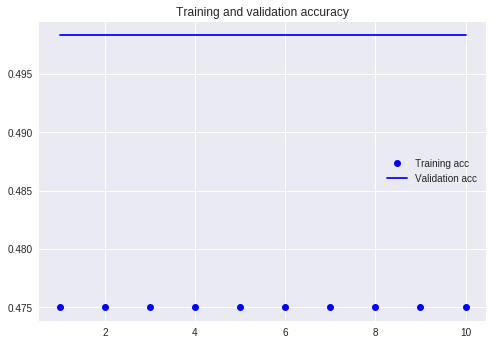

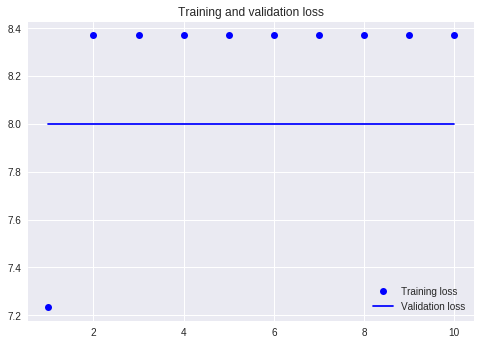

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


The model quickly starts overfitting, unsurprisingly given the small number of training samples. Validation accuracy though seems to reach 50s.

Note that your mileage may vary: since we have so few training samples, performance is heavily dependent on which exact 200 samples we 
picked, and we picked them at random. If it worked really poorly for you, try picking a different random set of 200 samples, just for the 
sake of the exercise (in real life you don't get to pick your training data).

We can also try to train the same model without loading the pre-trained word embeddings and without freezing the embedding layer. In that 
case, we would be learning a task-specific embedding of our input tokens, which is generally more powerful than pre-trained word embeddings 
when lots of data is available. However, in our case, we have only 200 training samples. Let's try it:

In [0]:
#Train a model with with an Embedding layer as before
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

maxlen = 200
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 384)          3840000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 76800)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2457632   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 6,297,665
Trainable params: 6,297,665
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 5s 24ms/step - loss: 1.0826 - acc: 0.4500 - val_loss: 0.7132 - val_acc: 0.5069
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.4704 -

In [0]:
#Save the model weights to a file
model.save_weights('task_specific_spacy_model.h5')

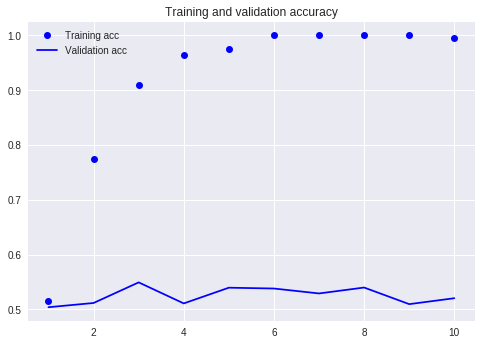

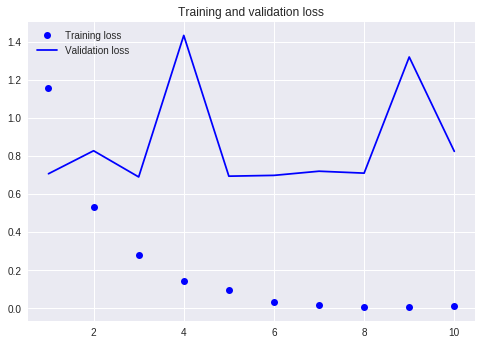

In [0]:
#Plot the performance of the model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Validation accuracy stalls in the low 50s. 

Finally, let's evaluate the model on the test data. First, we will need to tokenize the test data:

In [0]:
#Load the test data
def load_test_data(imdb_dir):
  test_dir = os.path.join(imdb_dir, 'test')

  labels = []
  texts = []

  for label_type in ['neg', 'pos']:
      dir_name = os.path.join(test_dir, label_type)
      for fname in sorted(os.listdir(dir_name)):
          if fname[-4:] == '.txt':
              f = open(os.path.join(dir_name, fname))
              texts.append(f.read())
              f.close()
              if label_type == 'neg':
                  labels.append(0)
              else:
                  labels.append(1)


  return texts, labels

texts, labels = load_test_data('.')

In [0]:
#Obtain the padded sequences for the test set
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=200)
y_test = np.asarray(labels)
  
x_test.shape

(25000, 200)

And let's load and evaluate the first model:

In [0]:
#Load the first model from the saved file
#Evaluate against the test set
model.load_weights('pre_trained_spacy_model.h5')

#Evaluate against the test set
#Reference - https://keras.io/models/model/#evaluate
loss, acc = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(loss, acc)


25000/25000 [==============================] - 9s 360us/step
(7.971192420387268, 0.5)
['loss', 'acc']


Lets try with the second model:

In [0]:
#Load the second model from the saved file
#Evaluate against the test set
model.load_weights('task_specific_spacy_model.h5')
loss, acc = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(loss, acc)

25000/25000 [==============================] - 8s 340us/step
['loss', 'acc']
(0.7483028992462158, 0.5092)


We get an appalling test accuracy of ~50% in both cases.

## An alternate approach with TfIdf

While using sequence vectors is one way transform our text data, and train a model, we can also use another approach by vectorizing the data using term frequencies across texts. Transforming text into Tfidf vectors is one such popular technique. Read more about TfIdf here: [https://en.wikipedia.org/wiki/Tf%E2%80%93idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

To convert our text to TfIdf vectors, we can use the popular Sci-kit learn library. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

# Vectorization parameters

# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500


def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as ngram vectors.
    1 text = 1 tf-idf vector the length of vocabulary of uni-grams + bi-grams.
    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.
    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train)
    x_val = selector.transform(x_val)

    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    return x_train, x_val, vectorizer, selector

In [0]:
#Load the dataset again
#Split the data into train and test
texts, labels = load_imdb('./')  
x_train, x_val, y_train, y_val = train_test_split(texts, labels, test_size=5000, train_size=20000, random_state=42)

#Output the shape of the new training data and test data
print(len(x_train), len(x_val))

(20000, 5000)


In [0]:
# Lets vectorize our texts using TfIdf
x_train, x_val, vectorizer, selector = ngram_vectorize(x_train, y_train, x_val)

In [0]:
print(x_train.shape, x_val.shape)


((20000, 20000), (5000, 20000))


In [0]:
x_test, y_test = load_test_data('.')
x_test = vectorizer.transform(x_test)
x_test = selector.transform(x_test)
x_test = x_test.astype('float32')

Let's use these vectors and train a simple neural network model and see how it performs on the validation set. 

In [0]:
from keras import models
from keras.layers import Dropout, Dense

def mlp_model(input_shape):
    """Creates an instance of a multi-layer perceptron model.
    # Returns
        An MLP model instance.
    """
    model = models.Sequential()
    model.add(Dropout(rate=0.3, input_shape=input_shape))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(units=1, activation="sigmoid"))
    return model

In [0]:
# Create model instance.
model = mlp_model(x_train.shape[1:]) 
optimizer = keras.optimizers.Adam(lr=1e-3)
# Create callback for early stopping on validation loss. If the loss does
# not decrease in two consecutive tries, stop training.
callbacks = [keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2)]
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['acc'])
history = model.fit(
          x_train,
          y_train,
          epochs=10,
          callbacks=callbacks,
          validation_data=(x_val, y_val),
          verbose=2,  # Logs once per epoch.
          batch_size=32)

# Print results.
history = history.history
print('Validation accuracy: {acc}, loss: {loss}'.format(
        acc=history['val_acc'][-1], loss=history['val_loss'][-1]))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 22s - loss: 0.2966 - acc: 0.8809 - val_loss: 0.2406 - val_acc: 0.9066
Epoch 2/10
 - 21s - loss: 0.1335 - acc: 0.9488 - val_loss: 0.2448 - val_acc: 0.9036
Epoch 3/10
 - 21s - loss: 0.0889 - acc: 0.9662 - val_loss: 0.2752 - val_acc: 0.8992
Validation accuracy: 0.8992, loss: 0.275228200442


As you can see, a simple model like this with TfIdf features goes a long way in getting a reasonable accuracy for such datasets with limited 
training examples. Let's evaluate this model on our test set and get some metrics.

In [0]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict_classes(x_test)

In [0]:
y_pred = [item[0] for item in list(y_pred)]

In [0]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.88      0.89     12500
          1       0.88      0.90      0.89     12500

avg / total       0.89      0.89      0.89     25000



In [0]:
print(accuracy_score(y_test, y_pred))

0.89048


## A first recurrent layer in Keras

In [0]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


`SimpleRNN` processes batches of sequences, like all other Keras layers, not just a single sequence.
Like all recurrent layers in Keras, `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive 
outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each 
input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor 
argument. Let's take a look at an example:

## Exercise 2: Lets add a SimpleRNN layer to our model with embedding dimension 32

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
# Add an Embedding layer of 10000 vocab size(or max features) and 32 dimensions
# ...
# Add a SimpleRNN layer of output 32 dimensions
# ...

model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. 
In such a setup, you have to get all intermediate layers to return full sequences:

In [0]:
# Let us add 3 more SimpleRNN layers. This time we also want to set the 
# `return_sequences` parameter to be True.
# This will return the output for each timestep as opposed to returning the output 
# for only the last timestep.
# Compare model.summary() to see this difference.
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# Lets use more number of words for our dataset
texts, labels = load_imdb('./')  
((input_train, y_train), (x_val, y_val)), tokenizer, data, labels, indices = tokenize_texts(texts, labels, maxlen, max_features, 20000,5000, verbose=True)
input_test, y_test = load_test_data('.', tokenizer, maxlen)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [0]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Let's display the training and validation loss and accuracy:

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Unfortunately, our small 
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is 
that our inputs only consider the first 500 words rather the full sequences -- 
hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. Let's take a look at some 
more advanced layers.

## A concrete LSTM example in Keras
Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network, 
similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every 
other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you 
having to spend time tuning parameters by hand.

## Exercise 3: Use an LSTM layer instead of a SimpleRNN layer

In [0]:
from keras.layers import LSTM

model = Sequential()
# Add an Embedding layer as before with 10000 vocab size(max features) and 32 output dimensions
# ...
# Add a LSTM layer of 32 dimensions
# ...

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

You can see that the accuracy is 87%, much higher than what we got with a SimpleRNN layer. 